In [ ]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


# 读取数据
data = pd.read_csv('../dataset/sam_club_customer_data.csv') 

# 🔭 显示数据表格头
print("数据表格：")
print(data.head())  # 显示前五行星轨记录



Duplicate key in file PosixPath('/home/lyn/miniconda3/envs/torch/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc'), line 271 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')


数据表格：
   average_spending  in_store_visits  online_purchases
0            303.35               23                19
1            116.79               15                17
2            248.46               26                 0
3             11.53                1                14
4             91.61                1                12



⚛️计算不同取值的SSE值


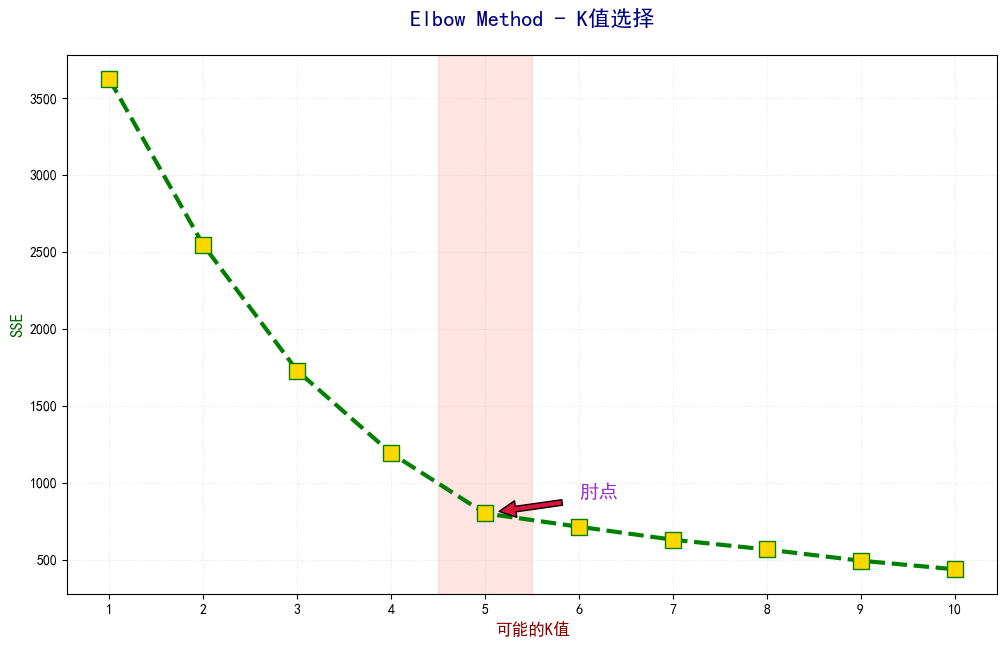

In [3]:
# 构建散点图
scaler = StandardScaler()
cosmic_data = scaler.fit_transform(data)

# 生成K的取值范围
sse = []
k_candidates = range(1, 11)  

# 计算不同取值的SSE值
print("\n⚛️计算不同取值的SSE值")
for k in k_candidates:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(cosmic_data)
    sse.append(kmeans.inertia_)
    print(f"▮" * (k*2), end='\r') 

# 🌈 显示折线图
plt.figure(figsize=(12, 7), dpi=100)
plt.plot(k_candidates, sse, 'gs--', markerfacecolor='gold', markersize=12, linewidth=3)
plt.xticks(np.arange(1, 11, 1))
plt.grid(True, alpha=0.3, linestyle=':')

# 🎨 设置图头
plt.title('Elbow Method - K值选择', 
          fontsize=16, 
          color='navy',
          pad=20)
plt.xlabel('可能的K值', 
           fontsize=12, 
           
           color='darkred')
plt.ylabel('SSE', 
           fontsize=12, 
           
           color='darkgreen')
plt.annotate('肘点',
             xy=(5, sse[4]), 
             xytext=(6, sse[4]+100),
             arrowprops=dict(facecolor='crimson', shrink=0.15),
             fontsize=14,
             color='darkorchid')

# ⚠️ 临界警告色带
plt.axvspan(4.5, 5.5, alpha=0.2, color='salmon')  # 红色警示区域

# 🖼️ 完成星图打印
plt.show()


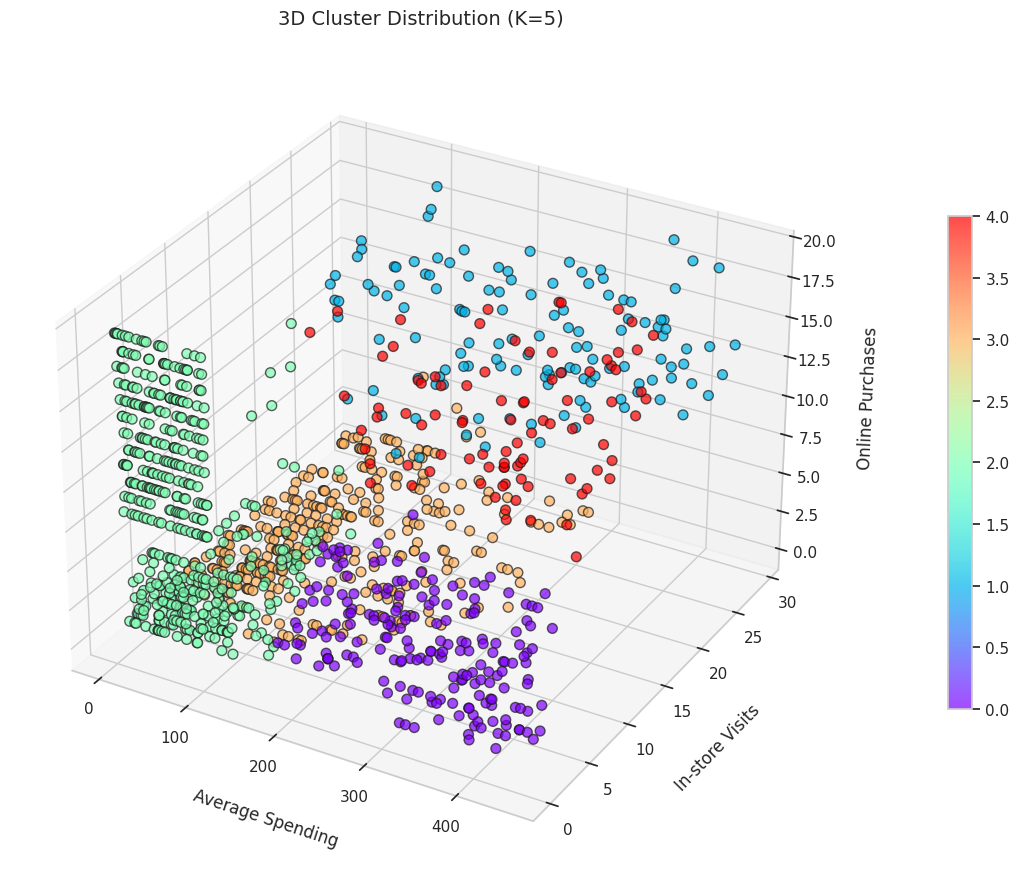

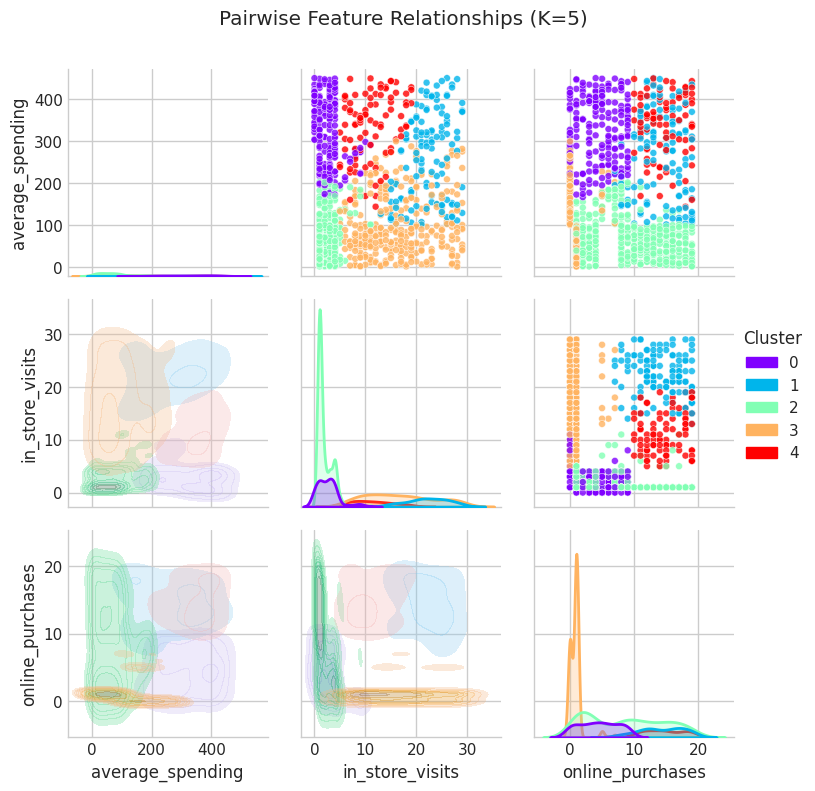

In [23]:
import seaborn as sns

# 2. 数据预处理
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['average_spending', 'in_store_visits', 'online_purchases']])

# 3. 执行K-means聚类（K=5）
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

# 4. 3D散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 动态生成5种颜色
colors = plt.cm.rainbow(np.linspace(0, 1, 5))

scatter = ax.scatter(
    data['average_spending'], 
    data['in_store_visits'], 
    data['online_purchases'], 
    c=data['Cluster'], 
    cmap='rainbow',
    edgecolor='k',
    s=50,
    alpha=0.7
)

ax.set_xlabel('\nAverage Spending', linespacing=3.5)
ax.set_ylabel('\nIn-store Visits', linespacing=3.5)
ax.set_zlabel('\nOnline Purchases', linespacing=3.5)
ax.set_title('3D Cluster Distribution (K=5)', pad=20, fontsize=14)
plt.colorbar(scatter, shrink=0.6, aspect=20, pad=0.1)
plt.tight_layout()
plt.show()

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
# 5. 特征分布矩阵图（增强版）
g = sns.PairGrid(
    data,
    vars=['average_spending', 'in_store_visits', 'online_purchases'],
    hue='Cluster',
    palette='rainbow',
    height=2.5
)
g.map_upper(sns.scatterplot, s=25, alpha=0.8, edgecolor='w')
g.map_lower(sns.kdeplot, fill=True, alpha=0.3)
g.map_diag(sns.kdeplot, fill=True, linewidth=2)
g.fig.suptitle('Pairwise Feature Relationships (K=5)', y=1.05)
g.add_legend(title='Cluster')
plt.show()
